In [1]:
import numpy as np # linear algebra
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
import util
from timeit import default_timer as timer
# set a results file
logger = util.result(path="", file="results.logs")
logger.propagate = False

<h3 style="color: #dddda1">Pull configs and set defaults</h3>

In [2]:
files = util.get_config_values("files")
validation_types = util.get_config_values("validation_types")
split_types = util.get_config_values("split_types")
split_size = util.get_config_values("split_size")
preprocessors = util.get_config_values("preprocessors")
models = util.get_config_values("models")
evaluators = util.get_config_values("evaluators")
alpha_range = np.linspace(0.01,500,1000, endpoint=False)
folds = util.get_config_values("general", list_type=False, key="folds")
wl = np.arange(880,2210,5.2) # Set wavelength range

<h2 style="color: #dddda1">Pipeline 1 (1 File + SNV + KFOLDS CV + LASSO + MSE)</h2>

INFO ************************************
INFO Pipeline Start...
INFO Pipeline params :
INFO Data : 2022_06_24.csv , Preprocessor : snv, Model : lasso, Evaluator : mse
INFO Validation type : kfold-cv, Alpha range : [1.0000000e-02 5.0999000e-01 1.0099800e+00 1.5099700e+00 2.0099600e+00
 2.5099500e+00 3.0099400e+00 3.5099300e+00 4.0099200e+00 4.5099100e+00
 5.0099000e+00 5.5098900e+00 6.0098800e+00 6.5098700e+00 7.0098600e+00
 7.5098500e+00 8.0098400e+00 8.5098300e+00 9.0098200e+00 9.5098100e+00
 1.0009800e+01 1.0509790e+01 1.1009780e+01 1.1509770e+01 1.2009760e+01
 1.2509750e+01 1.3009740e+01 1.3509730e+01 1.4009720e+01 1.4509710e+01
 1.5009700e+01 1.5509690e+01 1.6009680e+01 1.6509670e+01 1.7009660e+01
 1.7509650e+01 1.8009640e+01 1.8509630e+01 1.9009620e+01 1.9509610e+01
 2.0009600e+01 2.0509590e+01 2.1009580e+01 2.1509570e+01 2.2009560e+01
 2.2509550e+01 2.3009540e+01 2.3509530e+01 2.4009520e+01 2.4509510e+01
 2.5009500e+01 2.5509490e+01 2.6009480e+01 2.6509470e+01 2.7009460e+01
 2.7

[Model Evaluation] MSE value between y_test and y_pred : 0.398
[Model Evaluation] MSE value between y_test and y_pred after pre-processing : 15.997


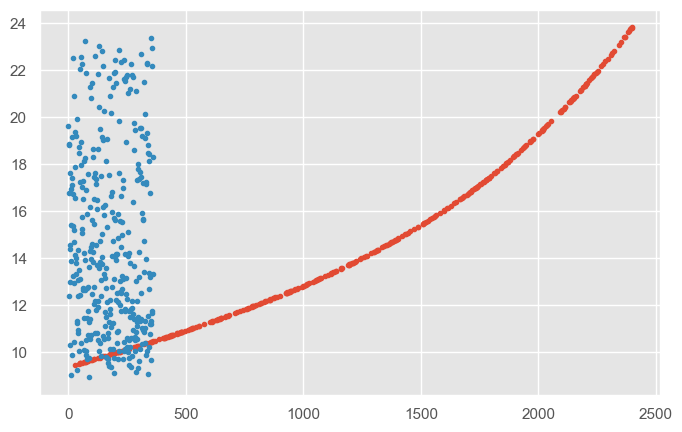

INFO Optimized alpha value for Lasso 0.0001792377010963378
INFO [MODEL EVALUATION]
INFO Model loss : 0.2649510106372632
INFO Elapsed time for pipeline run : 2.98
INFO Pipeline end...
INFO ************************************


In [3]:
dataset = files[2]       # choose no. of files and which file
split_params = {
    'sep' : ';',
    'drop_columns' : ['Timestamp', 'TS_sim'],
    'index_column' : 'Timestamp',
    'y_data_column' : 'TS_sim',
}

data = (X_train, X_test, y_train, y_test) = util.get_split_data(files=dataset, split_params=split_params, test_size=float(split_size[0]))

preprocessor_params = {}

pipeline_params = {
    'logger' : logger,
    'data' : data,
    'validation-type' : validation_types[0],
    'preprocessor' : preprocessors[3],
    'preprocessor-params' : preprocessor_params,
    'model' : models[1],
    'evaluator' : evaluators[0],
    'alpha_range' : alpha_range,
    'folds' : int(folds),
    'wl' : wl,
    'plotting' : False
}

start = timer()
logger.info("************************************")
logger.info("Pipeline Start...")
logger.info("Pipeline params :")
logger.info("Data : " + str(dataset) + " , Preprocessor : " + str(pipeline_params['preprocessor'])
            + ", Model : " + str(pipeline_params['model']) + ", Evaluator : " + str(pipeline_params['evaluator']))
logger.info("Validation type : " + str(pipeline_params['validation-type']) + ", Alpha range : "
            + str(pipeline_params['alpha_range']) + ", folds (for CV) : " + str(pipeline_params['folds']))
util.pipeline(pipeline_params)
end = timer()
logger.info("Elapsed time for pipeline run : " + str(round((end - start),2)))
logger.info("Pipeline end...")
logger.info("************************************")

<h2 style="color: #dddda1">Pipeline 1 (2 Files + SNV + KFOLDS CV + LASSO + MSE)</h2>

In [5]:
dataset = [files[0], files[1]]        # choose no. of files and which file
split_params = {
    'sep' : ';',
    'drop_columns' : ['Timestamp', 'TS_sim'],
    'index_column' : 'Timestamp',
    'y_data_column' : 'TS_sim',
}

data = (X_train, X_test, y_train, y_test) = util.get_split_data(files=dataset, split_params=split_params, test_size=float(split_size[0]))

preprocessor_params = {}

pipeline_params = {
    'logger' : logger,
    'data' : data,
    'validation-type' : validation_types[2],
    'preprocessor' : preprocessors[3],
    'preprocessor-params' : preprocessor_params,
    'model' : models[1],
    'evaluator' : evaluators[0],
    'alpha_range' : alpha_range,
    'folds' : int(folds),
    'wl' : wl,
    'plotting' : False
}

start = timer()
logger.info("************************************")
logger.info("Pipeline Start...")
logger.info("Pipeline params :")
logger.info("Data : " + str(dataset) + " , Preprocessor : " + str(pipeline_params['preprocessor'])
            + ", Model : " + str(pipeline_params['model']) + ", Evaluator : " + str(pipeline_params['evaluator']))
logger.info("Validation type : " + str(pipeline_params['validation-type']) + ", Alpha range : "
            + str(pipeline_params['alpha_range']) + ", folds (for CV) : " + str(pipeline_params['folds']))
util.pipeline(pipeline_params)
end = timer()
logger.info("Elapsed time for pipeline run : " + str(round((end - start),2)))
logger.info("Pipeline end...")
logger.info("************************************")

INFO ************************************
INFO Pipeline Start...
INFO Pipeline params :
INFO Data : ['2022_07_13.csv', '2022_06_22.csv'] , Preprocessor : snv, Model : lasso, Evaluator : mse
INFO Validation type : repeated-kfold-cv, Alpha range : [1.0000000e-02 5.0999000e-01 1.0099800e+00 1.5099700e+00 2.0099600e+00
 2.5099500e+00 3.0099400e+00 3.5099300e+00 4.0099200e+00 4.5099100e+00
 5.0099000e+00 5.5098900e+00 6.0098800e+00 6.5098700e+00 7.0098600e+00
 7.5098500e+00 8.0098400e+00 8.5098300e+00 9.0098200e+00 9.5098100e+00
 1.0009800e+01 1.0509790e+01 1.1009780e+01 1.1509770e+01 1.2009760e+01
 1.2509750e+01 1.3009740e+01 1.3509730e+01 1.4009720e+01 1.4509710e+01
 1.5009700e+01 1.5509690e+01 1.6009680e+01 1.6509670e+01 1.7009660e+01
 1.7509650e+01 1.8009640e+01 1.8509630e+01 1.9009620e+01 1.9509610e+01
 2.0009600e+01 2.0509590e+01 2.1009580e+01 2.1509570e+01 2.2009560e+01
 2.2509550e+01 2.3009540e+01 2.3509530e+01 2.4009520e+01 2.4509510e+01
 2.5009500e+01 2.5509490e+01 2.6009480e+01 2

[Model Evaluation] MSE value between y_test and y_pred : 0.507
[Model Evaluation] MSE value between y_test and y_pred after pre-processing : 14.697


INFO Optimized alpha value for Lasso 0.3185597504709255
INFO [MODEL EVALUATION]
INFO Model loss : 0.4074783685589046
INFO Elapsed time for pipeline run : 28.07
INFO Pipeline end...
INFO ************************************
